In [1]:
import numpy as np
import random
from tqdm import trange
import matplotlib.pyplot as plt

from mino import BasicMinorityGame

In [2]:
N, M, K = 1024+1, 12, 6
# N: number of players
# M: length of memory
# K: strategy space for each player

T_SIMU = 1000

In [3]:
g = BasicMinorityGame(num_agent=N, brain_size=M, strat_choices=K)

In [4]:
attnrec, gamerec = g.simulate(T_SIMU)

100%|██████████| 1000/1000 [00:02<00:00, 432.95it/s]


average attendance:
	513.062


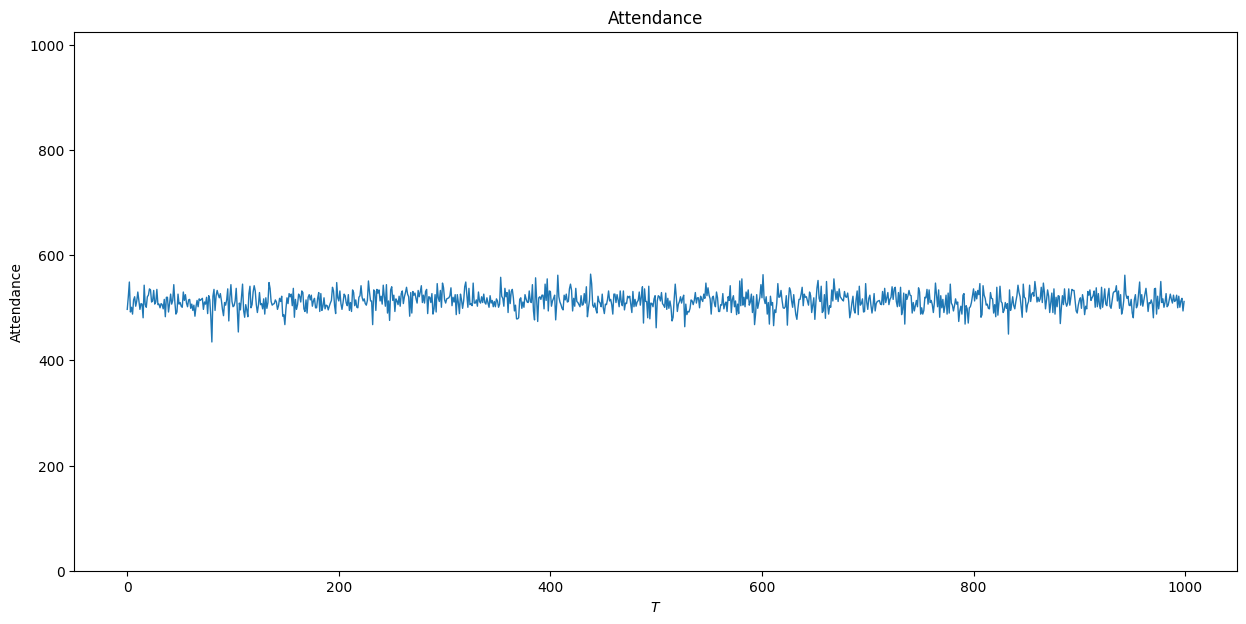

In [5]:
print(f"average attendance:\n\t{np.mean(attnrec)}")

plt.figure(figsize=(15, 7))
plt.plot(attnrec, lw=1.0)
plt.ylim((0,N))
plt.title('Attendance')
plt.xlabel('$T$')
plt.ylabel('Attendance')
plt.show()

In [6]:
gamerec = np.array(gamerec)
win_count = np.cumsum(gamerec, axis=0)*1.0

In [7]:
win_rate = win_count/np.cumsum(np.ones_like(win_count), axis=0)

final_round = win_rate[-1, :]
min_wr_idx = np.argwhere(final_round==np.min(final_round))[0]
max_wr_idx = np.argwhere(final_round==np.max(final_round))[0]
print(f"max wr\n\t{np.max(final_round)}")
print(f"min wr\n\t{np.min(final_round)}")

max wr
	0.535
min wr
	0.429


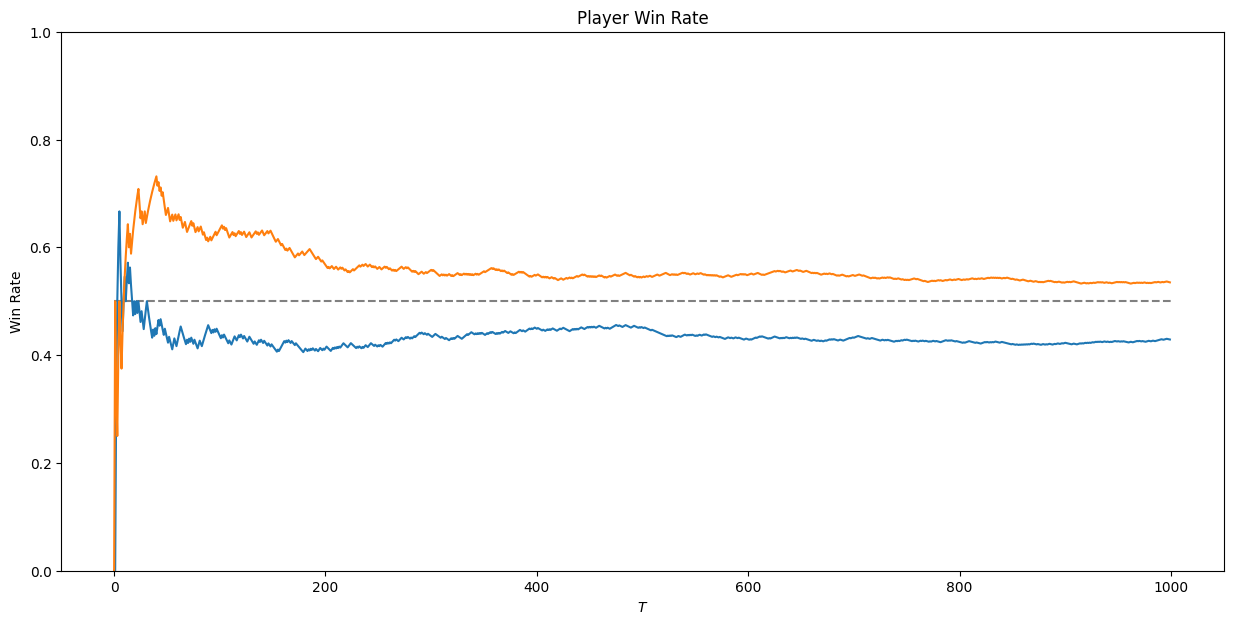

In [8]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0.5, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
plt.plot(win_rate[:, min_wr_idx])
plt.plot(win_rate[:, max_wr_idx])
plt.ylim((0,1))
plt.title('Player Win Rate')
plt.xlabel('$T$')
plt.ylabel('Win Rate')
plt.show()

In [9]:
mean_win_count = np.mean(win_count, axis=1).reshape(T_SIMU,1)

decentralized_performance = win_count-mean_win_count


final_round = decentralized_performance[-1, :]
min_perf_idx = np.argwhere(final_round==np.min(final_round))[0]
max_perf_idx = np.argwhere(final_round==np.max(final_round))[0]
print(f"max decentralized_performance\n\t{np.max(final_round)}")
print(f"min decentralized_performance\n\t{np.min(final_round)}")

max decentralized_performance
	48.14829268292681
min decentralized_performance
	-57.85170731707319


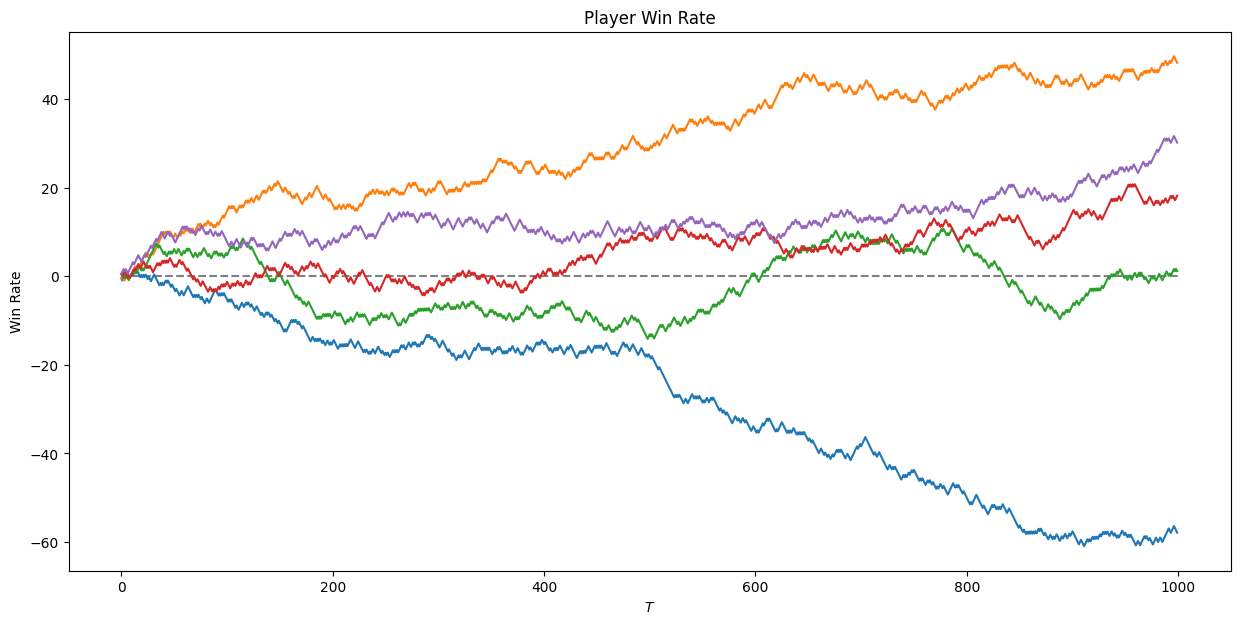

In [10]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
plt.plot(decentralized_performance[:, min_perf_idx])
plt.plot(decentralized_performance[:, max_perf_idx])

rand_idx = np.random.choice(np.arange(N), size=3, replace=False)
plt.plot(decentralized_performance[:, rand_idx[0]])
plt.plot(decentralized_performance[:, rand_idx[1]])
plt.plot(decentralized_performance[:, rand_idx[2]])
plt.title('Player Win Rate')
plt.xlabel('$T$')
plt.ylabel('Win Rate')
plt.show()